# Importing libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Loading data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading data
base_dir = '/content/drive/MyDrive/Colab Notebooks/COMP0189: Applied AI/cw1/dataset_diabetes/'  # Update this to the actual path
diabetes_df = pd.read_csv(base_dir + 'diabetic_data.csv')

# Task #1: Dataset description

In [4]:
diabetes_df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
# Replace '?' with NaN
diabetes_df.replace('?', np.nan, inplace=True)

In [6]:
print("Dataset Shape:", diabetes_df.shape)

Dataset Shape: (101766, 50)


In [7]:
# Data types
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
# Load the mapping CSV file
IDs_mapping = pd.read_csv(base_dir + 'IDs_mapping.csv', header=None)

# Find the start and end indices for each mapping based on the categorical variable names
admission_type_start = IDs_mapping[IDs_mapping.iloc[:, 0] == "admission_type_id"].index[0] + 1
discharge_disp_start = IDs_mapping[IDs_mapping.iloc[:, 0] == "discharge_disposition_id"].index[0] + 1
admission_source_start = IDs_mapping[IDs_mapping.iloc[:, 0] == "admission_source_id"].index[0] + 1

admission_type_end = discharge_disp_start - 3
discharge_disp_end = admission_source_start - 3

df_adm_type = IDs_mapping.loc[admission_type_start:admission_type_end].reset_index(drop=True)
df_discharge = IDs_mapping.loc[discharge_disp_start:discharge_disp_end].reset_index(drop=True)
df_adm_source = IDs_mapping.loc[admission_source_start:].reset_index(drop=True)

df_adm_type.rename(columns={0: "admission_type_id", 1: "admission_type"}, inplace=True)
df_discharge.rename(columns={0: "discharge_disposition_id", 1: "discharge_disposition"}, inplace=True)
df_adm_source.rename(columns={0: "admission_source_id", 1: "admission_source"}, inplace=True)

df_adm_type['admission_type_id'] = df_adm_type['admission_type_id'].astype(int)
df_discharge['discharge_disposition_id'] = df_discharge['discharge_disposition_id'].astype(int)
df_adm_source['admission_source_id'] = df_adm_source['admission_source_id'].astype(int)

diabetes_df = diabetes_df.merge(df_adm_type, on="admission_type_id", how="left").drop(columns=['admission_type_id'])
diabetes_df = diabetes_df.merge(df_discharge, on="discharge_disposition_id", how="left") # .drop(columns=['discharge_disposition_id'])
diabetes_df = diabetes_df.merge(df_adm_source, on="admission_source_id", how="left").drop(columns=['admission_source_id'])

# Check the result
print(diabetes_df[['admission_type', 'discharge_disposition', 'admission_source']].head())

  admission_type discharge_disposition     admission_source
0            NaN            Not Mapped   Physician Referral
1      Emergency    Discharged to home       Emergency Room
2      Emergency    Discharged to home       Emergency Room
3      Emergency    Discharged to home       Emergency Room
4      Emergency    Discharged to home       Emergency Room


In [9]:
# Summary Statistics
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0
number_emergency,101766.0,1.978362e-01,9.304723e-01,0.0,0.0,0.0,0.000000e+00,76.0
number_inpatient,101766.0,6.355659e-01,1.262863e+00,0.0,0.0,0.0,1.000000e+00,21.0


In [10]:
# Sample-to-feature ratio
num_samples, num_features = diabetes_df.shape
print(f"\nSample-to-Feature Ratio: {num_samples} samples / {num_features} features")


Sample-to-Feature Ratio: 101766 samples / 51 features


## Missing values

In [11]:
# Checking for missing values
print(diabetes_df.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
discharge_disposition_id        0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [12]:
# Percentage of missing values
print(diabetes_df.isnull().mean())

encounter_id                0.000000
patient_nbr                 0.000000
race                        0.022336
gender                      0.000000
age                         0.000000
weight                      0.968585
discharge_disposition_id    0.000000
time_in_hospital            0.000000
payer_code                  0.395574
medical_specialty           0.490822
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
diag_1                      0.000206
diag_2                      0.003518
diag_3                      0.013983
number_diagnoses            0.000000
max_glu_serum               0.947468
A1Cresult                   0.832773
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.000000
glimepiride                 0.000000
a

## Class distribution

In [13]:
# Class distribution for the target variable 'readmitted'
class_counts = diabetes_df['readmitted'].value_counts()

print(class_counts)

# Percentage distribution
class_percentage = (class_counts / len(diabetes_df)) * 100
print("\nClass Distribution in Percentage:\n", class_percentage)

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Class Distribution in Percentage:
 readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: count, dtype: float64


In [14]:
# Simplifying the target class (readmitted)
diabetes_df['readmitted'] = diabetes_df['readmitted'].map({'<30': 1, '>30': 1, 'NO': 0})

print(diabetes_df['readmitted'].value_counts())

readmitted
0    54864
1    46902
Name: count, dtype: int64


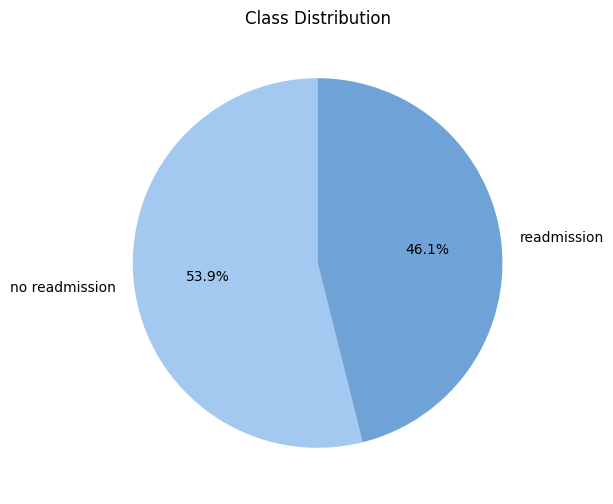

In [15]:
# Percentage distribution
class_counts = diabetes_df['readmitted'].value_counts()
class_percentage = (class_counts / len(diabetes_df)) * 100

# Pie chart
class_percentage.index = class_percentage.index.map({0: 'no readmission', 1: 'readmission'})
plt.figure(figsize=(6, 6))
plt.pie(class_percentage, labels=class_percentage.index, autopct='%1.1f%%', startangle=90, colors=["#A3C9F1", "#6FA3D7"])
plt.title("Class Distribution")
plt.show()

## Figures/plots

In [16]:
numeric_col = diabetes_df.select_dtypes(include=['number']).drop(columns=['readmitted', 'encounter_id', 'patient_nbr', 'discharge_disposition_id'])
categorical_col = diabetes_df.select_dtypes(include=['object', 'category']).columns

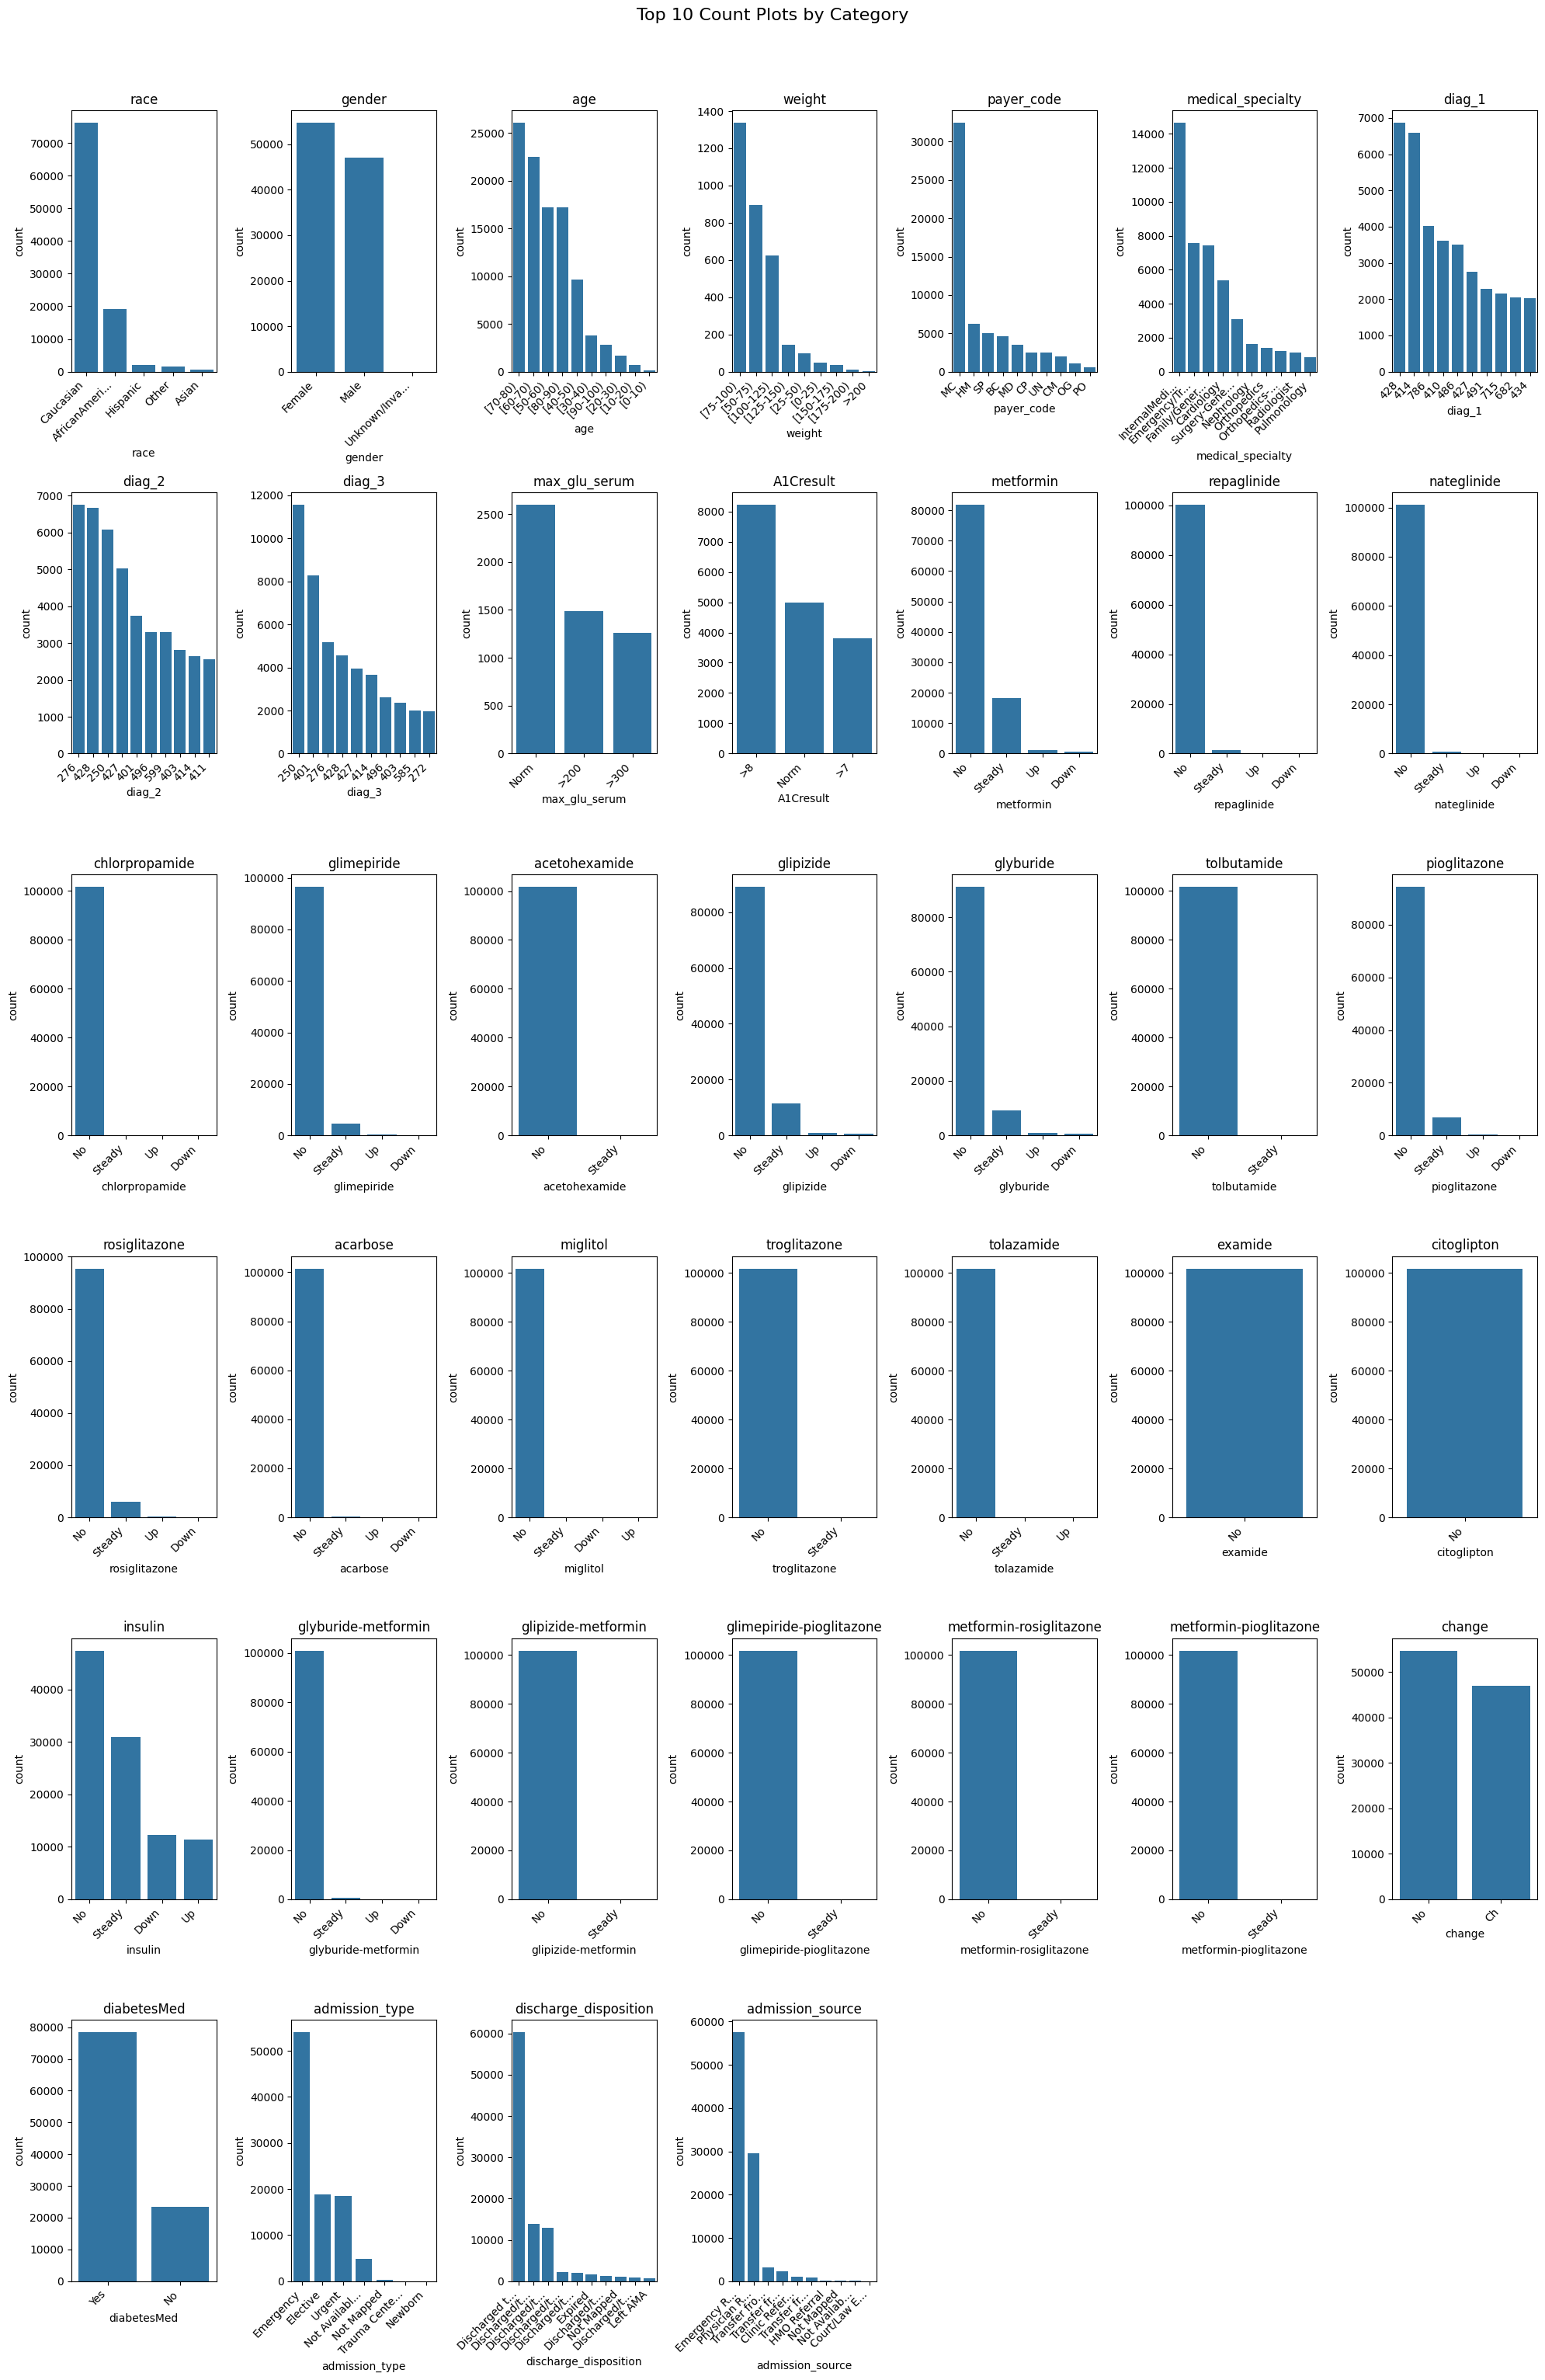

In [17]:
# Count plots for categorical variables
n_cols = 7
n_rows = (len(categorical_col) // n_cols) + (1 if len(categorical_col) % n_cols != 0 else 0)

# Create the subplots
plt.figure(figsize=(20, n_rows * 5))

for i, var in enumerate(categorical_col, 1):
    plt.subplot(n_rows, n_cols, i)

    # Get the top 10 most frequent categories
    top_categories = diabetes_df[var].value_counts().nlargest(10).index

    # Create the count plot for only the top 10 categories
    ax = sns.countplot(x=diabetes_df[var], order=top_categories)

    # Truncate x-axis labels to the first 10 characters
    ax.set_xticklabels([label.get_text()[:12] + '...' if len(label.get_text()) > 12 else label.get_text() for label in ax.get_xticklabels()], rotation=45, ha="right")

    plt.title(f'{var}')

plt.suptitle("Top 10 Count Plots by Category", fontsize=16, y=1.02)
plt.tight_layout()

# Save the figure
plt.savefig("Countplots by Category.png", dpi=300, bbox_inches="tight")  # Saves as a high-quality PNG

plt.show()

In [18]:
# Check the number of unique values
diabetes_df[['medical_specialty','diag_1', 'diag_2', 'diag_3', 'patient_nbr']].nunique()

,0
medical_specialty,72
diag_1,716
diag_2,748
diag_3,789
patient_nbr,71518


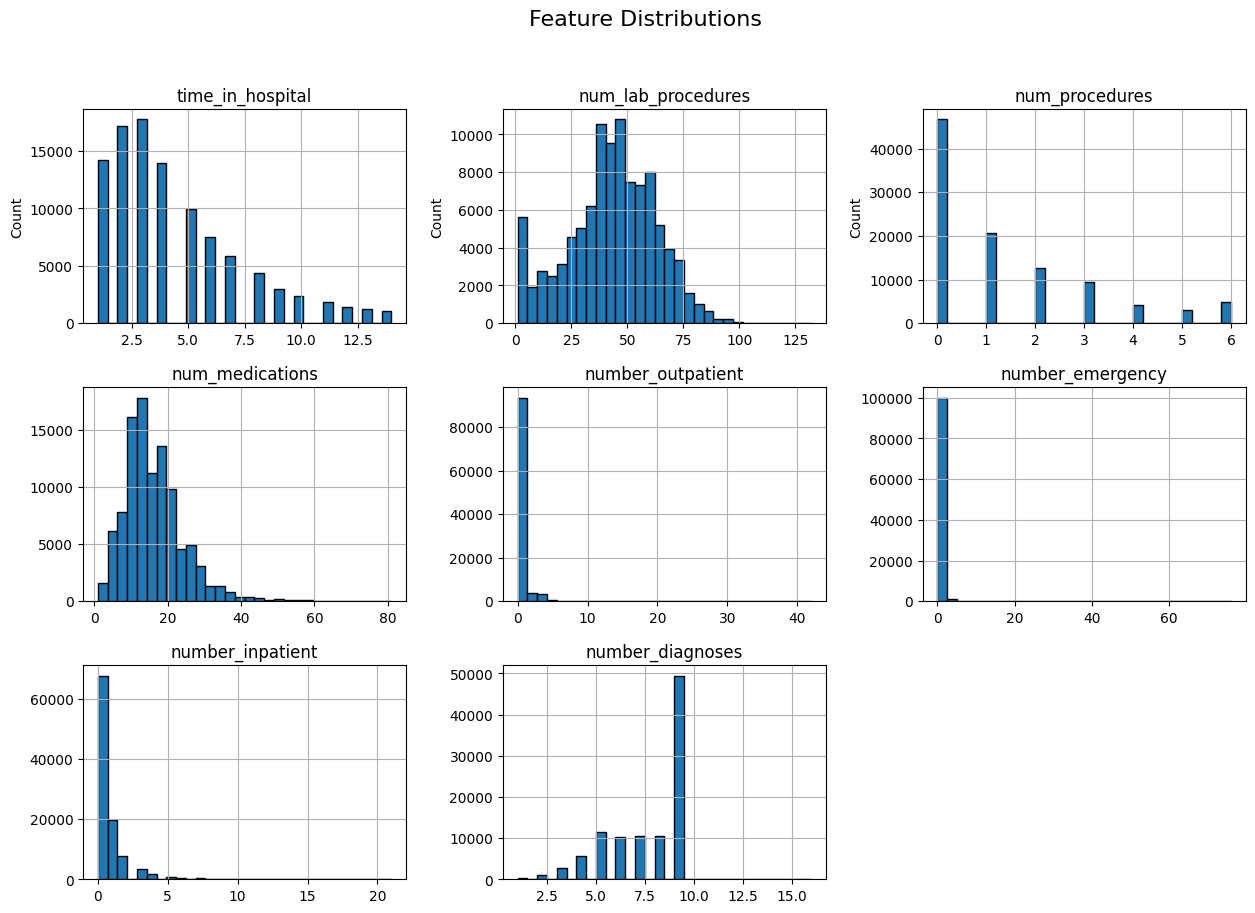

In [19]:
# Visualizing distributions of numerical features
axes = numeric_col.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
for ax in axes[0]:
    ax.set_xlabel(ax.get_label(), fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
# Save the figure
plt.savefig("Feature Distributions.png", dpi=300, bbox_inches="tight")  # Saves as a high-quality PNG
plt.show()

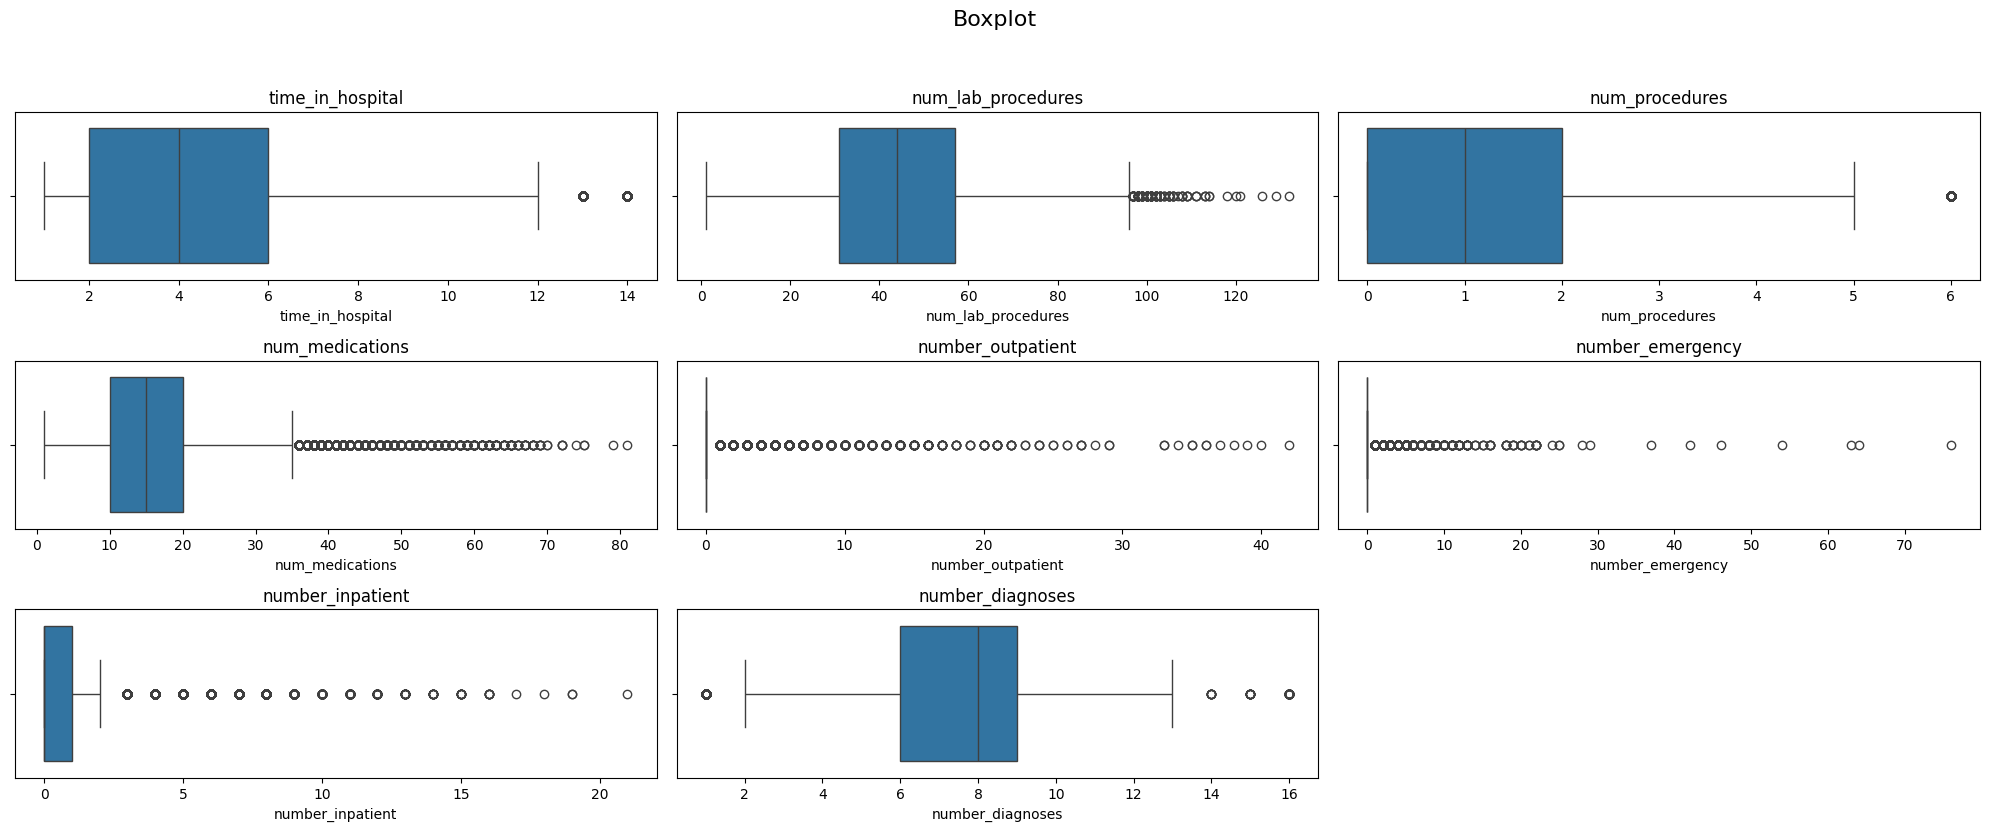

In [20]:
# Box plots to identify outliers
plt.figure(figsize=(20, 15))
for i, var in enumerate(numeric_col, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x=diabetes_df[var])
    plt.title(f'{var}')

plt.suptitle("Boxplot", fontsize=16, y=1.02)
plt.tight_layout()

# Save the figure
plt.savefig("Boxplots.png", dpi=300, bbox_inches="tight")  # Saves as a high-quality PNG

plt.show()

# Task #2: Data assembling and initial pre-processing

In [21]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [22]:
# DATA CLEANING: Disregard non-returning patient entries

# List of discharge_disposition_id values to remove
excluded_discharge_ids = [11, 13, 14, 19, 20, 21]

# Remove patients who cannot be readmitted
diabetes_df = diabetes_df[~diabetes_df["discharge_disposition_id"].isin(excluded_discharge_ids)]
diabetes_df.drop(columns=['discharge_disposition_id'], inplace=True)

diabetes_df.shape

(99343, 50)

In [23]:
# Define ICD-9 chapter groups
icd9_categories = {
    "001-139": "Infectious diseases",
    "140-239": "Neoplasms",
    "240-279": "Endocrine/metabolic",
    "280-289": "Blood diseases",
    "290-319": "Mental disorders",
    "320-389": "Neurological diseases",
    "390-459": "Circulatory diseases",
    "460-519": "Respiratory diseases",
    "520-579": "Digestive diseases",
    "580-629": "Genitourinary diseases",
    "630-679": "Pregnancy-related",
    "680-709": "Skin diseases",
    "710-739": "Musculoskeletal",
    "740-759": "Congenital anomalies",
    "760-779": "Perinatal conditions",
    "780-799": "Symptoms & ill-defined",
    "800-999": "Injuries & poisoning"
}

# Function to map ICD-9 codes to broader categories
def map_icd9_to_category(code):
    try:
        code = int(code)  # Convert to integer (handle missing values)
        for key in icd9_categories:
            low, high = map(int, key.split('-'))
            if low <= code <= high:
                return icd9_categories[key]
    except ValueError:
        pass
    return "Other"  # For unknown/missing codes

# Apply mapping to diag_1, diag_2, diag_3
for col in ['diag_1', 'diag_2', 'diag_3']:
    diabetes_df[col + '_grouped'] = diabetes_df[col].apply(map_icd9_to_category)

# Drop original columns
diabetes_df.drop(columns=['diag_1', 'diag_2', 'diag_3'], inplace=True)

# Convert categorical features into numerical using one-hot encoding
diabetes_df = pd.get_dummies(diabetes_df, columns=['diag_1_grouped', 'diag_2_grouped', 'diag_3_grouped'], drop_first=True)

diabetes_df.shape

(99343, 95)

In [24]:
diabetes_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,diag_3_grouped_Injuries & poisoning,diag_3_grouped_Mental disorders,diag_3_grouped_Musculoskeletal,diag_3_grouped_Neoplasms,diag_3_grouped_Neurological diseases,diag_3_grouped_Other,diag_3_grouped_Pregnancy-related,diag_3_grouped_Respiratory diseases,diag_3_grouped_Skin diseases,diag_3_grouped_Symptoms & ill-defined
0,2278392,8222157,Caucasian,Female,[0-10),NaN,1,NaN,Pediatrics-Endocrinology,41,...,False,False,False,False,False,True,False,False,False,False
1,149190,55629189,Caucasian,Female,[10-20),NaN,3,NaN,NaN,59,...,False,False,False,False,False,False,False,False,False,False
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,2,NaN,NaN,11,...,False,False,False,False,False,True,False,False,False,False
3,500364,82442376,Caucasian,Male,[30-40),NaN,2,NaN,NaN,44,...,False,False,False,False,False,False,False,False,False,False
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,NaN,NaN,51,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# Define Features (X) and Label (y)
X = diabetes_df.drop(columns=['readmitted'])  # Drop the target column
y = diabetes_df['readmitted']  # Target variable

In [26]:
# Reduce Computation Load
X_final, _, y_final, _ = train_test_split(X, y, train_size=40000, random_state=42, stratify=y)

print(f"Final dataset shape: {X_final.shape}, {y_final.shape}")

Final dataset shape: (40000, 94), (40000,)


In [27]:
# Separate into train (80%) and test (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)

# Print the shapes of the resulting datasets
print(f"Train dataset shape: {X_train.shape}, {y_train.shape}")
print(f"Test dataset shape: {X_test.shape}, {y_test.shape}")

Train dataset shape: (32000, 94), (32000,)
Test dataset shape: (8000, 94), (8000,)


In [28]:
def preprocess_dataset(dataset):
    # Initialize lists to store column names that are dropped
    dropped_columns_missing = []
    dropped_columns_single_value = []

    # Drop columns where more than 10% of the values are missing
    threshold = 0.10
    missing_cols = dataset.columns[dataset.isnull().mean() >= threshold]
    dropped_columns_missing.extend(missing_cols)
    dataset = dataset.loc[:, dataset.isnull().mean() < threshold]

    # Drop features with only one unique outcome
    single_value_cols = dataset.columns[dataset.nunique() <= 1]
    dropped_columns_single_value.extend(single_value_cols)
    dataset = dataset.loc[:, dataset.nunique() > 1]

    # Log the dropped columns and reasons
    if dropped_columns_missing:
        print(f"Dropped columns with more than 10% missing values: {dropped_columns_missing}")
    if dropped_columns_single_value:
        print(f"Dropped columns with only one unique value: {dropped_columns_single_value}")

    # Drop the specific columns
    dataset = dataset.drop(columns=['encounter_id'], errors='ignore')

    # Dynamically update numeric and categorical columns after dropping unwanted columns
    numeric_col = dataset.select_dtypes(include=['number']).columns
    numeric_col = numeric_col.drop("patient_nbr")
    categorical_col = dataset.select_dtypes(include=['object', 'category']).columns

    return dataset, numeric_col, categorical_col

In [29]:
# Preprocess the dataset
X_train, numeric_col, categorical_col = preprocess_dataset(X_train)

Dropped columns with more than 10% missing values: ['weight', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult']
Dropped columns with only one unique value: ['acetohexamide', 'troglitazone', 'examide', 'citoglipton', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


In [30]:
X_test = X_test[X_train.columns]

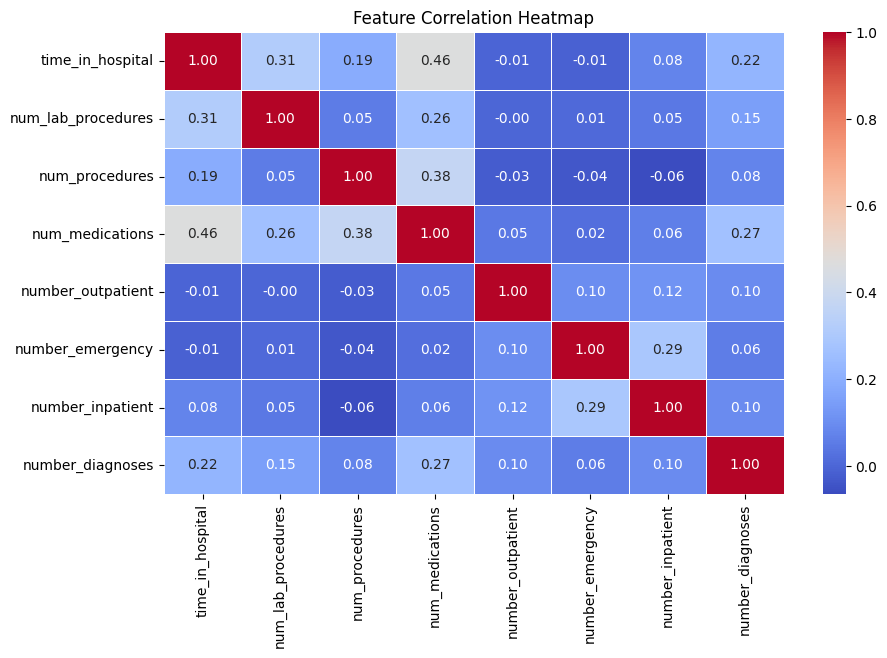

In [31]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X_train[numeric_col].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")

# Save the figure
plt.savefig("Correlation Heatmap.png", dpi=300, bbox_inches="tight")  # Saves as a high-quality PNG


plt.show()

In [32]:
# Create a Pipeline to preprocess numerical features
impute_and_scale = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

In [33]:
# Create a Pipeline to preprocess categorical features
impute_and_encode = Pipeline([
    ("impute", SimpleImputer(strategy='most_frequent')),
    ("encode", OneHotEncoder(handle_unknown='ignore'))
])

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', impute_and_scale, numeric_col),  # Scale and impute numerical columns
        ('categorical', impute_and_encode, categorical_col)  # One-hot encode and impute categorical columns
    ]
)

# Task #3: Machine learning pipeline

In [35]:
# Importing libraries
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Set a random state for reproducibility
RANDOM_STATE = 42

In [36]:
def make_full_pipeline(model):
    return Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

def optimise_hyperparameters(model, params_dict: dict, X_train: pd.DataFrame, y_train: pd.Series, groups: pd.Series):
    # CV strategy
    group_kfold = GroupKFold(n_splits=5)

    # Define the GridSearchCV
    tuner = GridSearchCV(make_full_pipeline(model),
                        cv=group_kfold.split(X_train, y_train, groups),
                        param_grid=params_dict,
                        n_jobs=-1,
                        refit=True,
                        scoring="accuracy")

    # Ensure 'patient_nbr' is NOT in the feature set
    X_train_filtered = X_train.drop(columns=['patient_nbr'])

    # Fit the model
    return tuner.fit(X_train_filtered, y_train)

In [37]:
# Define the parameter grids for each model
svm_params = {'classifier__C': [0.001, 0.01, 0.1, 1, 10], 'classifier__penalty': ['l1', 'l2']}
rf_params = {'classifier__n_estimators': [200, 400, 600, 800, 1000], 'classifier__max_depth': [10, 20]}
xgb_params = {'classifier__n_estimators': [50, 100, 150, 200], 'classifier__max_depth': [3, 6, 9]}

# Models to compare
models = [
    (LinearSVC(random_state=RANDOM_STATE), svm_params),
    (RandomForestClassifier(random_state=RANDOM_STATE), rf_params),
    (XGBClassifier(random_state=RANDOM_STATE), xgb_params),
]

In [38]:
groups = X_train['patient_nbr']  # Patient number

tuned_svm = optimise_hyperparameters(LinearSVC(random_state=RANDOM_STATE), svm_params, X_train, y_train, groups)
tuned_rf = optimise_hyperparameters(RandomForestClassifier(random_state=RANDOM_STATE), rf_params, X_train, y_train, groups)
tuned_xgb = optimise_hyperparameters(XGBClassifier(random_state=RANDOM_STATE), xgb_params, X_train, y_train, groups)

In [39]:
# Remove 'patient_nbr' from test set before prediction
X_test = X_test.drop(columns=['patient_nbr'])

In [40]:
# Function to evaluate performance
def evaluate_performance(model_name: str, tuner: GridSearchCV, X_test: pd.DataFrame, y_test: pd.Series, results_df: pd.DataFrame):
    # Get cross-validation results
    cv_test_scores = tuner.cv_results_["mean_test_score"]
    cv_score_mean = cv_test_scores.mean()
    cv_score_std = cv_test_scores.std()

    # Make predictions on the test set
    y_pred = tuner.predict(X_test)

    # Calculate test accuracy
    test_score = accuracy_score(y_test, y_pred)

    # Add results to the DataFrame
    results_df.loc[len(results_df)] = [model_name, tuner.best_params_, cv_score_mean, cv_score_std, test_score]

In [41]:
# Function to plot model performance

def plot_cv_results(grid_search, param_name, binary_param_name, model_name, log_scale=False):
    """
    Plots Cross-Validation Accuracy vs. a Numeric Hyperparameter, with another Binary/Categorical Parameter in the Legend.

    Parameters:
    - grid_search: Trained GridSearchCV object.
    - param_name: The numeric hyperparameter to plot on the X-axis.
    - binary_param_name: The categorical/binary hyperparameter for different series in the plot.
    - model_name: The model name (used for the title).
    - log_scale: Whether to use a log scale for the X-axis.
    """

    # Extract results from GridSearchCV
    results = pd.DataFrame(grid_search.cv_results_)

    # Extract relevant parameters
    results = results[['mean_test_score', 'std_test_score', f'param_{param_name}', f'param_{binary_param_name}']]
    results = results.rename(columns={f'param_{param_name}': param_name, f'param_{binary_param_name}': binary_param_name})

    plt.figure(figsize=(10, 5))

    # Iterate over unique values of the binary parameter to plot separate curves
    for value in results[binary_param_name].unique():
        subset = results[results[binary_param_name] == value]
        subset = subset.sort_values(by=param_name)

        plt.errorbar(subset[param_name], subset["mean_test_score"],
                     yerr=subset["std_test_score"], fmt='o-',
                     capsize=5, label=f"{binary_param_name}={value}")

    # Apply log scale for specific cases
    if log_scale:
        plt.xscale('log')

    # Formatting
    plt.xlabel(f'{param_name}')
    plt.ylabel('Cross-validation Accuracy')
    plt.title(f'{model_name}: Accuracy vs {param_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print best parameters
    best_result = results.loc[results["mean_test_score"].idxmax()]
    print(f"\n🔹 Best Parameters for {model_name}:")
    print(f"  {param_name} = {best_result[param_name]}, {binary_param_name} = {best_result[binary_param_name]}")
    print(f"  Accuracy: {best_result['mean_test_score']:.3f} ± {best_result['std_test_score']:.3f}\n")

In [42]:
# Initialize results_df
results_df = pd.DataFrame(columns=['Model', 'Best Parameters', 'Mean CV Accuracy', "CV Accuracy std", 'Test Accuracy'])

evaluate_performance("SVC", tuned_svm, X_test, y_test, results_df)
evaluate_performance("RandomForest", tuned_rf, X_test, y_test, results_df)
evaluate_performance("XGBoost", tuned_xgb, X_test, y_test, results_df)

# Display  results
results_df

,Model,Best Parameters,Mean CV Accuracy,CV Accuracy std,Test Accuracy
0,SVC,"{'classifier__C': 0.001, 'classifier__penalty'...",0.618594,0.000912,0.628500
1,RandomForest,"{'classifier__max_depth': 10, 'classifier__n_e...",0.626163,0.000916,0.626250
2,XGBoost,"{'classifier__max_depth': 3, 'classifier__n_es...",0.615474,0.010151,0.627625


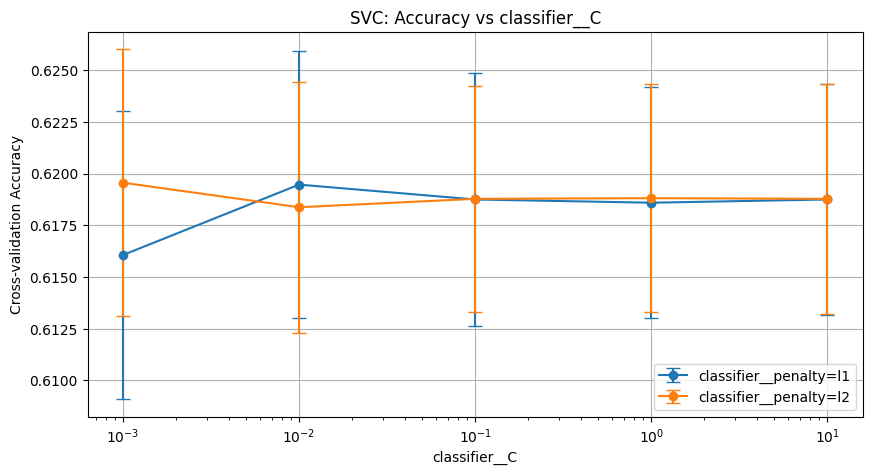


🔹 Best Parameters for SVC:
  classifier__C = 0.001, classifier__penalty = l2
  Accuracy: 0.620 ± 0.006



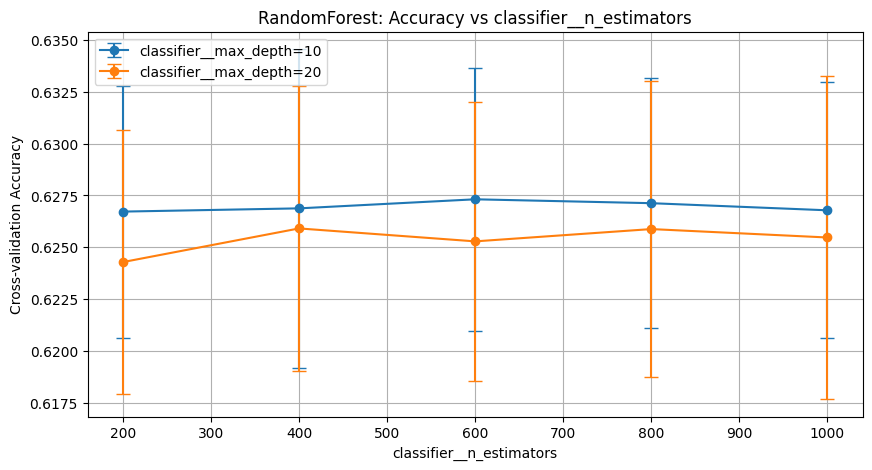


🔹 Best Parameters for RandomForest:
  classifier__n_estimators = 600.0, classifier__max_depth = 10.0
  Accuracy: 0.627 ± 0.006



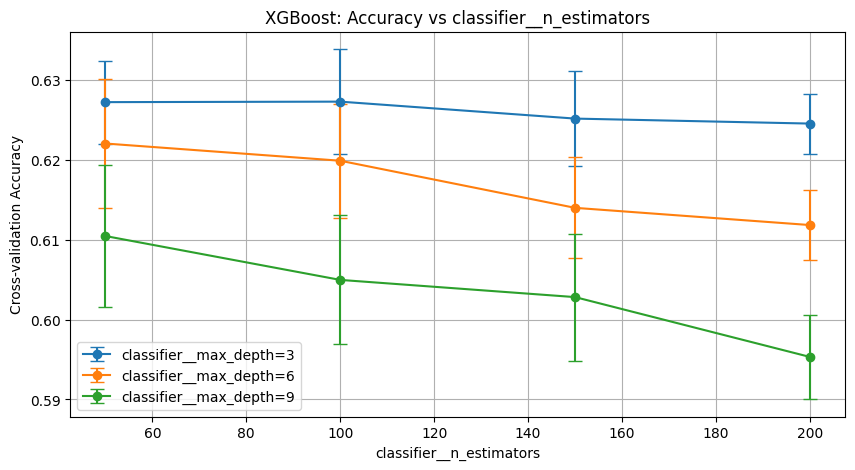


🔹 Best Parameters for XGBoost:
  classifier__n_estimators = 100.0, classifier__max_depth = 3.0
  Accuracy: 0.627 ± 0.007



In [43]:
# Plot model performance

# Plot for SVC
plot_cv_results(tuned_svm, param_name="classifier__C", binary_param_name="classifier__penalty", model_name="SVC", log_scale=True)

# Plot for Random Forest
plot_cv_results(tuned_rf, param_name="classifier__n_estimators", binary_param_name="classifier__max_depth", model_name="RandomForest")

# Plot for XGBoost
plot_cv_results(tuned_xgb, param_name="classifier__n_estimators", binary_param_name="classifier__max_depth", model_name="XGBoost")

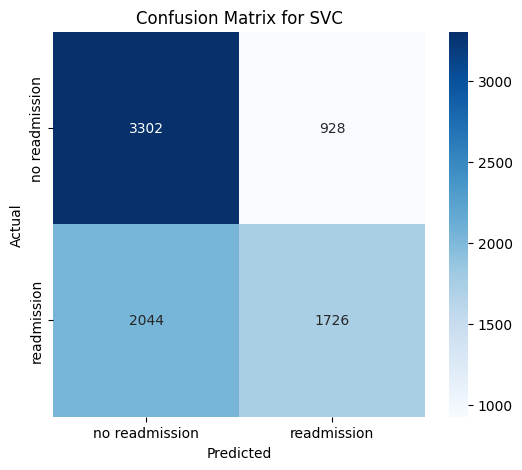

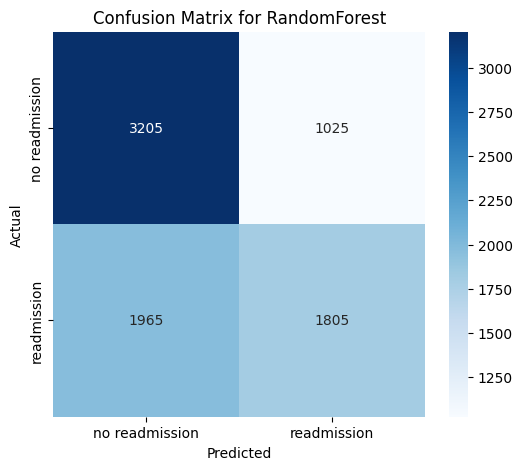

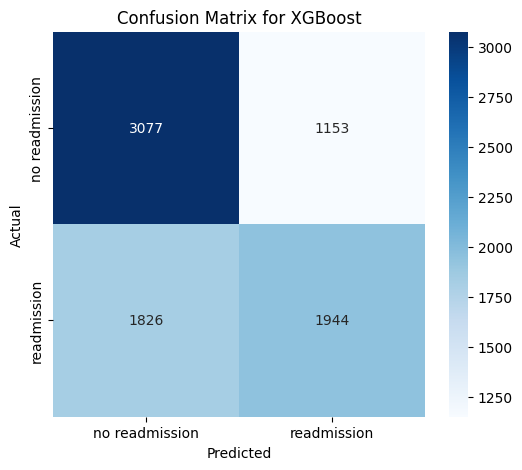

In [44]:
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix using heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["no readmission", "readmission"], yticklabels=["no readmission", "readmission"])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for each of the best models

# SVC
y_pred_svc = tuned_svm.predict(X_test)
plot_confusion_matrix("SVC", y_test, y_pred_svc)

# RandomForest
y_pred_rf = tuned_rf.predict(X_test)
plot_confusion_matrix("RandomForest", y_test, y_pred_rf)

# XGBoost
y_pred_xgb = tuned_xgb.predict(X_test)
plot_confusion_matrix("XGBoost", y_test, y_pred_xgb)

# Task #4: Model interpretation

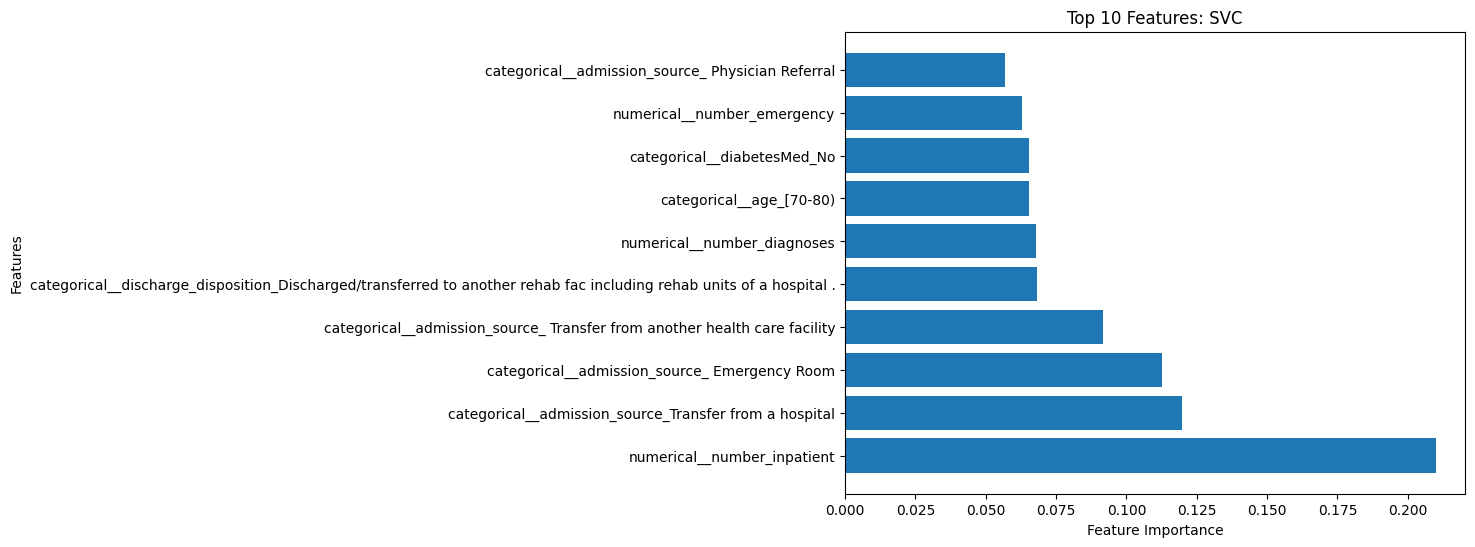

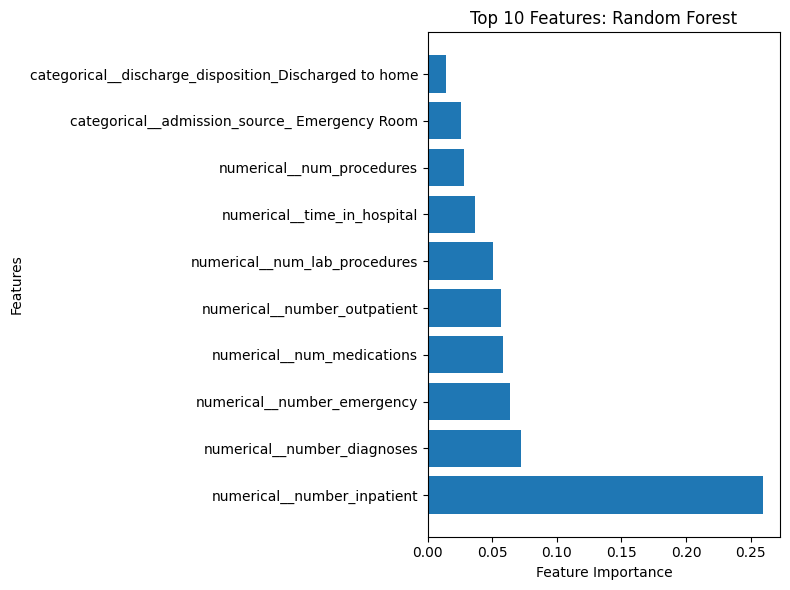

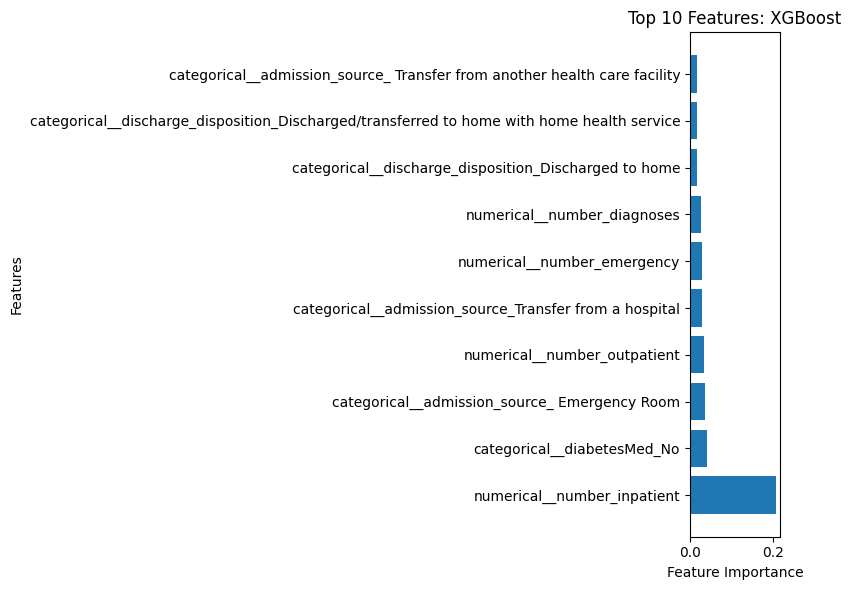

In [45]:
from sklearn.inspection import permutation_importance

def plot_feature_importances(tuner: GridSearchCV, model_name, X_train, y_train):
    """Plot feature importances for different models in a GridSearchCV pipeline."""

    # Get the best estimator from the tuner
    model = tuner.best_estimator_.named_steps['classifier']

    # Extract feature importances
    if hasattr(model, 'feature_importances_'):
        # Tree-based models like RandomForest or XGBoost
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # Handle LinearSVC separately since it has no 'kernel' attribute
        if isinstance(model, LinearSVC) or (hasattr(model, "kernel") and model.kernel == "linear"):
            importances = np.abs(model.coef_).flatten()
        else:
            # Use permutation importance for non-linear models
            print(f"Using permutation importance for non-linear {model_name}")
            X_transformed = tuner.best_estimator_.named_steps['preprocessor'].transform(X_train)

            # Convert sparse matrix to dense if needed
            if hasattr(X_transformed, "toarray"):
                X_transformed = X_transformed.toarray()

            result = permutation_importance(model, X_transformed, y_train, n_repeats=10, random_state=42)
            importances = result.importances_mean
    else:
        raise ValueError(f"Model {model_name} does not support feature importances or coefficients.")

    # Extract the feature names
    names = tuner.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

    # Sort the importances and corresponding feature names
    importances_sorted = sorted(zip(names, importances), key=lambda x: abs(x[1]), reverse=True)
    top_features = importances_sorted[:10]

    # Plot the top features
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.barh([x[0] for x in top_features], [x[1] for x in top_features])
    ax.set_title(f"Top 10 Features: {model_name}")
    ax.set_xlabel("Feature Importance")
    ax.set_ylabel("Features")
    fig.tight_layout()
    plt.show()

# Example usage with tuned models and training data
plot_feature_importances(tuned_svm, "SVC", X_train, y_train)
plot_feature_importances(tuned_rf, "Random Forest", X_train, y_train)
plot_feature_importances(tuned_xgb, "XGBoost", X_train, y_train)

# Task #5: Alternative machine learning pipeline

In [46]:
# Importing libraries
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

In [47]:
rfe = RFE(estimator=XGBClassifier(random_state=RANDOM_STATE), n_features_to_select=10)

def make_full_pipeline(model):
    return Pipeline([
        ("preprocessor", preprocessor),
        ('feature_selector', rfe),
        ("classifier", model)
    ])

In [48]:
# Best model
clf = XGBClassifier(random_state=RANDOM_STATE)

# Create the full pipeline with feature selection
pipeline = make_full_pipeline(clf)

# CV strategy
group_kfold = GroupKFold(n_splits=5)

# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=group_kfold.split(X_train, y_train, groups), scoring='accuracy')

# Print the scores
print("Cross-validation scores:", scores)
print("Mean CV score:", scores.mean())
print("Standard deviation:", scores.std())

# Ensure 'patient_nbr' is NOT in the feature set
X_train_filtered = X_train.drop(columns=['patient_nbr'])

# Fit on the entire training set after cv
pipeline.fit(X_train_filtered, y_train)

# Evaluate the performance on the test set
test_score = pipeline.score(X_test, y_test)
print("Test score:", test_score)

Cross-validation scores: [0.62234375 0.615      0.6040625  0.6115625  0.6228125 ]
Mean CV score: 0.6151562500000001
Standard deviation: 0.007018391019314906
Test score: 0.61275


In [49]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=['no readmission', 'readmission'])
print(report)

                precision    recall  f1-score   support

no readmission       0.61      0.76      0.68      4230
   readmission       0.63      0.44      0.52      3770

      accuracy                           0.61      8000
     macro avg       0.62      0.60      0.60      8000
  weighted avg       0.62      0.61      0.60      8000



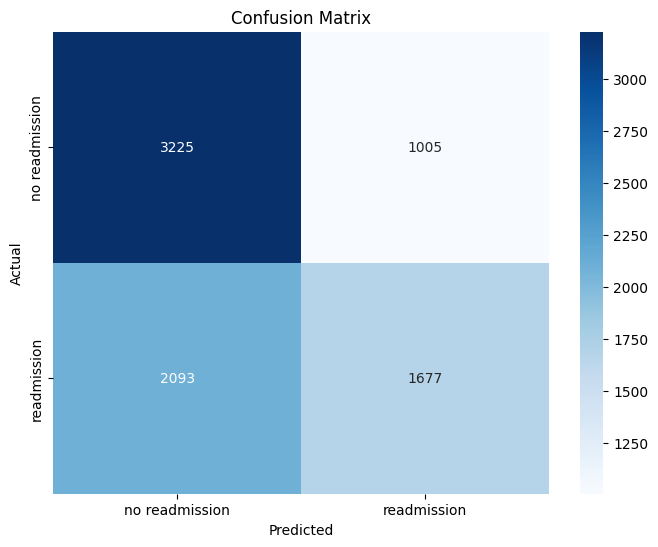

In [50]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Map the class names to the numerical values
class_mapping = {0: 'no readmission', 1: 'readmission'}

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[class_mapping[i] for i in np.unique(y_test)],
            yticklabels=[class_mapping[i] for i in np.unique(y_test)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()